### Loading useful libraries
More details about them can be found in `readme.md`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

### Loading dataset and converting it to dataframe using Pandas

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Simple EDA

In [3]:
cols_to_delete = df.columns[df.isna().sum()/len(df) >= .999]
cols_to_delete

Index([], dtype='object')

In [4]:
# example of how to count unique values in a column
print(pd.crosstab(index=df["sepal length (cm)"], columns="count") )

col_0              count
sepal length (cm)       
4.3                    1
4.4                    3
4.5                    1
4.6                    4
4.7                    2
4.8                    5
4.9                    6
5.0                   10
5.1                    9
5.2                    4
5.3                    1
5.4                    6
5.5                    7
5.6                    6
5.7                    8
5.8                    7
5.9                    3
6.0                    6
6.1                    6
6.2                    4
6.3                    9
6.4                    7
6.5                    5
6.6                    2
6.7                    8
6.8                    3
6.9                    4
7.0                    1
7.1                    1
7.2                    3
7.3                    1
7.4                    1
7.6                    1
7.7                    4
7.9                    1


In [5]:
count_sepal_length = (df['sepal length (cm)'] == 5.0).sum()
print(count_sepal_length)

10


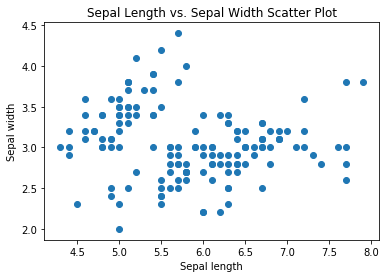

In [6]:
# plotting works a lot better with np arrays, so we convert dimensions to nparrays to plot
x1 = np.array(df['sepal length (cm)'])
x2 = np.array(df['sepal width (cm)'])
plt.plot()
plt.title('Sepal Length vs. Sepal Width Scatter Plot')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x1, x2)
plt.show()

## Implementing K-Means

### Elbow method to determine optimal K value

In [7]:
x = df.iloc[:, [0,1,2,3]].values

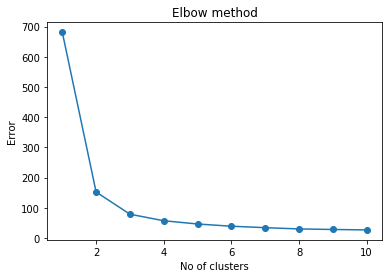

In [8]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error, marker = 'o')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

### The plot above shows us that the optimal number of clusters is 3. We will use that to train our model

In [9]:
kmeans = KMeans(n_clusters=3).fit(x)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [10]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

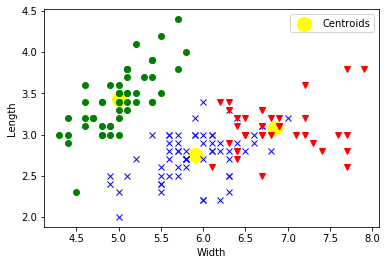

In [11]:
x = np.array(list(zip(x1, x2)))
colors = ['b', 'g', 'r']
markers = ['x', 'o', 'v']
plt.ylabel('Length')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 200, c= 'yellow', label = 'Centroids')

for i,j in enumerate(kmeans.labels_):
    plt.plot(x1[i], x2[i], color=colors[j], marker=markers[j])
plt.xlabel('Width')
plt.legend()
plt.show()

### Other plot options

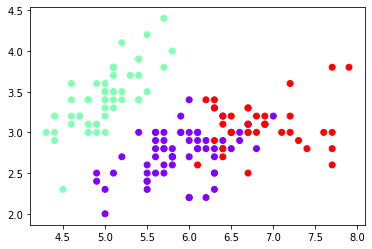

In [12]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='rainbow')

### Example Cluster Prediction

In [22]:
kmeans.predict(np.array([5.3, 2.9, 1.5, 2.3]).reshape(1,-1) )[0]

1

## End